# Titanic Dataset
## Building a Predictor to forecast which passengers will survive

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [21]:
df = pd.read_csv('../../Datasets/titanic/train.csv')
test = pd.read_csv('../../Datasets/titanic/test.csv')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


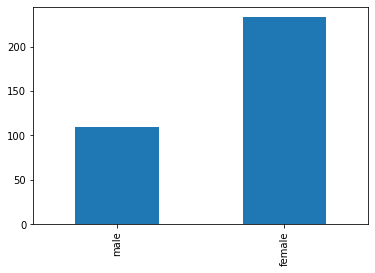

In [23]:
df[df.Survived > 0].Sex.value_counts().sort_values().plot(kind='bar');

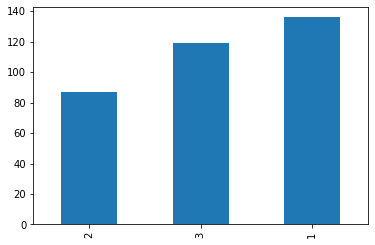

In [24]:
df[df.Survived > 0].Pclass.value_counts().sort_values().plot(kind='bar');

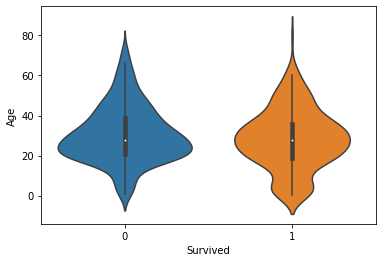

In [25]:
sns.violinplot(data=df, x='Survived', y='Age');

In [26]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [51]:
# Data Prep. Pipeline
#df['Level'] = df["Cabin"].str.extract(r'([ABCDEFG])')
#df['CabNum'] = df["Cabin"].str.extract(r'(\d+)')

df_predict = df.drop(["Name", "SibSp", "Parch", "Ticket", "Cabin",
                      "Embarked"], axis=1)
df_predict = df_predict.dropna()

label = df_predict.Survived
data = df_predict.drop(columns=["PassengerId", "Survived"])

sex_dict = {"male": 0, "female": 1}
level_dict = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6}
data.Sex = data.Sex.map(sex_dict)
#data.Level = data.Level.map(level_dict)
data = data.dropna()

In [55]:
# Data Prep. Pipeline
#test['Level'] = test["Cabin"].str.extract(r'([ABCDEFG])')
#test['CabNum'] = test["Cabin"].str.extract(r'(\d+)')
df_test = df.drop(["Name", "SibSp", "Parch", "Ticket", "Cabin",
                      "Embarked"], axis=1)
df_test = df_test.dropna()

test_label = df_test.Survived
test_data = df_test.drop(columns=["PassengerId", "Survived"])

sex_dict = {"male": 0, "female": 1}
level_dict = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6}
test_data.Sex = test_data.Sex.map(sex_dict)
#test_data.Level = test_data.Level.map(level_dict)
test_data = test_data.dropna()

In [56]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(data, label)

y_pred = model.predict(test_data)

acc = accuracy_score(test_label, y_pred)
print(acc)

0.8179271708683473


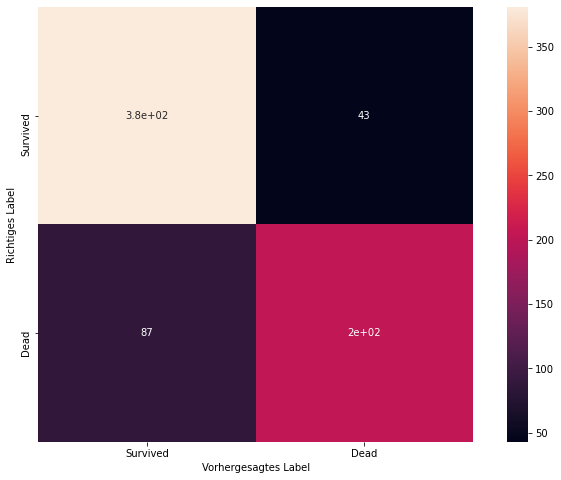

In [57]:
mat = confusion_matrix(test_label, y_pred)
labels = ["Survived", "Dead"]

plt.figure(figsize=(12, 8))
sns.heatmap(mat, square=True, annot=True)
plt.xlabel('Vorhergesagtes Label')
locs = plt.xticks()[0]
plt.xticks(locs, labels)
plt.ylabel('Richtiges Label')
plt.yticks(locs, labels);

<BarContainer object of 4 artists>

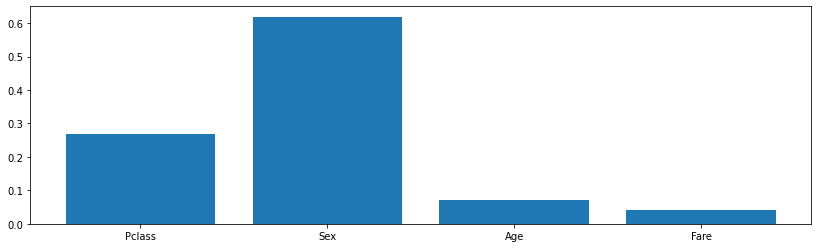

In [58]:
fi = model.feature_importances_
plt.figure(figsize=(14, 4))
plt.bar(data.columns, fi)

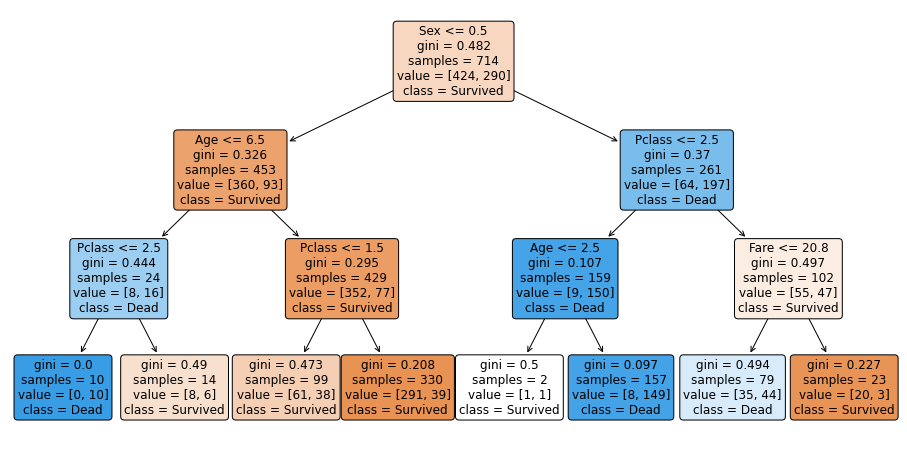

In [59]:
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=data.columns, filled=True, class_names=labels,
          fontsize=12, rounded=True);